In [48]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from datetime import datetime

In [51]:
# constants
v_0 = -5.0
R = 15.0
M = 1000

x = np.linspace(-R, R, M+1)
delta = x[1] - x[0]

# matrix
diag = 2/delta**2+v_0*np.exp(-x[1:-1]**2)
subdiag = -1/delta**2 * np.ones(M-2)

diags = [subdiag, diag, subdiag]

H = scipy.sparse.diags(diags,[-1,0,1]).toarray()

In [66]:
e = scipy.linalg.eigvalsh_tridiagonal(diag, subdiag, select='v', select_range=(v_0,0.0))
print(e)

[-3.14048429 -0.40635647]


In [67]:
e_max = np.max(scipy.linalg.eigvalsh_tridiagonal(diag, subdiag*np.ones(M-2)))
e_max

4444.395414961617

In [68]:
np.max(np.real(scipy.linalg.eigvals(H)))

4444.395414961624

In [71]:
H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()

np.min(np.real(scipy.linalg.eigvals(H_))) + e_max/2.0

-3.140484287037907

In [78]:
phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))

num_iter = 1000

for i in range(num_iter):
    phi_2 = H @ phi_1
    
#     l = np.dot(phi_2, phi_1)
    
#     print(i, l + e_max/2.0)
    
    phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
e_max = np.dot(phi_2, phi_1)

H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()

phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))

num_iter = 1001

for i in range(num_iter):
    phi_2 = H_ @ phi_1
    
#     l = np.dot(phi_2, phi_1)
    
#     print(i, l + e_max/2.0)
    
    phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
-np.dot(phi_2, phi_1) + e_max/2.0, e_max

(-3.1392174820598484, 4441.4289634666)

In [92]:
def iter_m(num_iter, A, x):
    
    phi_1 = np.exp(-x[1:-1]**2) / scipy.linalg.norm(np.exp(-x[1:-1]**2))
    
    for i in range(num_iter):
        phi_2 = A @ phi_1    
        phi_1 = phi_2 / scipy.linalg.norm(phi_2)
    
    return abs(np.dot(phi_2, phi_1))

def iter_method_time(v_0, R, M):
    start_time = datetime.now()
    
    x = np.linspace(-R, R, M+1)
    delta = x[1] - x[0]
    
    # matrix
    diag = 2/delta**2+v_0*np.exp(-x[1:-1]**2)
    subdiag = -1/delta**2 * np.ones(M-2)

    diags = [subdiag, diag, subdiag]

    H = scipy.sparse.diags(diags,[-1,0,1]).toarray()
    
    e_max = iter_m(1000, H, x)
    
    H_ = H - e_max/2.0 * scipy.sparse.identity(M-1).toarray()
    
    e_1 = -iter_m(1000, H_, x) + e_max/2.0

    return (datetime.now() - start_time), e_1


In [95]:
N = 10
mm = np.arange(1,N+1)*1000
t = [None] * N
e_1 = np.zeros(N)

for i in range(N):
    t[i], e_1[i] = iter_method_time(-5.0, 6.0, mm[i])
    print(i, mm[i], t[i], e_1[i])

0 1000 0:00:01.745593 -3.1109121380141005
1 2000 0:00:05.843912 -3.0918328284751624
2 3000 0:00:07.941875 -3.0868877206667094
3 4000 0:00:13.156278 -3.0850164997391403
4 5000 0:00:21.001884 -3.0841205716715194
5 6000 0:00:30.755726 -3.08362592587946
6 7000 0:00:41.647820 -3.0833259691717103
7 8000 0:00:56.314249 -3.0831296528922394
8 9000 0:01:05.604326 -3.0829945274163038
9 10000 0:01:37.960818 -3.0828978354111314


In [99]:
t[-1]

datetime.timedelta(seconds=97, microseconds=960818)

In [101]:
tt = [t_.seconds+t_.microseconds*1e-6 for t_ in t]

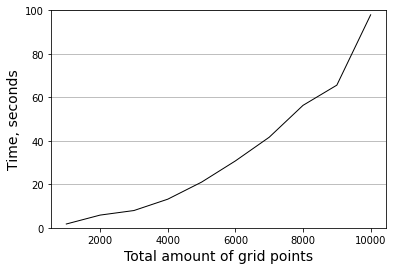

In [112]:
plt.plot(mm, tt, linewidth=1.0, color='black')
plt.xlabel('Total amount of grid points', fontsize=14)
plt.ylabel('Time, seconds', fontsize=14)
plt.grid(axis='y')

plt.ylim(0,100)

plt.savefig('figures/t_vs_m.png')

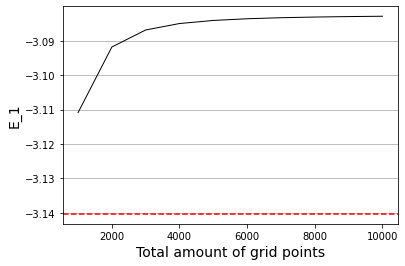

In [113]:
plt.plot(mm, e_1, linewidth=1.0, color='black')
plt.axhline(y=-3.140334020243438, color='red', linestyle='--')
plt.xlabel('Total amount of grid points', fontsize=14)
plt.ylabel('E_1', fontsize=14)
plt.grid(axis='y')

# plt.ylim(0,100)

plt.savefig('figures/e1_vs_m.png')